In [40]:
!ls | head

Analysis.ipynb


In [41]:
from glob import glob
import pickle as pkl
%pylab inline

from scipy.signal import savgol_filter


Populating the interactive namespace from numpy and matplotlib


In [42]:
data_dir="../../Bathymetry_Data/"

#### From Hugh's Email

n x 11 array (n being the number of points in the segment) with the human label in the first column and the 10 classifier scores in the following columns.

In [43]:
files=glob(data_dir+'*.pkl')
len(files)

2179

In [44]:
def read_pkl(file):
    with open(file,'rb') as pkl_file:
        D=pkl.load(pkl_file)
    human=D[1][:,0]
    preds=D[1][:,1:]
    return human,preds

In [45]:
good=[]
total=[]
for file in files:
    print(file,end='\r')
    human,preds=read_pkl(file)

    good.append(sum(human))
    total.append(human.shape[0])

In [46]:
frac_good=np.array([good[i]/total[i] for i in range(len(total))])
frac_good[:10]

array([0.94556   , 0.99997   , 0.99989   , 0.99459333, 0.99999123,
       0.41875   , 0.9997675 , 0.95249042, 0.97658   , 0.97785108])

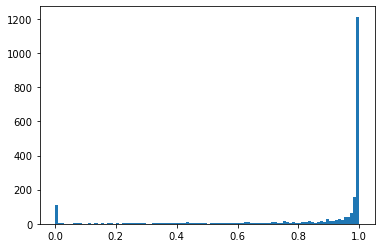

In [47]:
hist(frac_good,bins=100);

In [69]:
i=0

In [70]:
i+=1
while frac_good[i] <0.9:
    i+=1

In [71]:
#i=323

1 0.99997 ../../Bathymetry_Data/test_JAMSTEC_MR07-05.part3.tsv.pkl_scores.pkl 100000


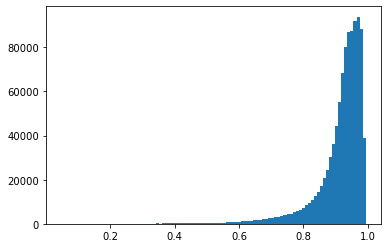

In [72]:
human,preds=read_pkl(files[i])
print(i,frac_good[i],files[i],human.shape[0])

hist(preds.flatten(),bins=100);

In [73]:
i

1

In [74]:
_mean=np.mean(preds,axis=1)
smooth_mean=savgol_filter(_mean, 51, 3)
_std=np.std(preds,axis=1)
#i=22000; j=22500
i=9500; j=10000

In [75]:
def plot_scores(_mean,_std,human,i=0,j=-1):
    plot(_mean[i:j])
    plot(_std[i:j])
    plot(human[i:j])

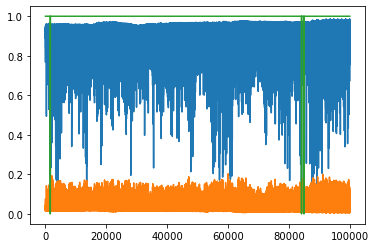

In [78]:
plot_scores(_mean,_std,human);

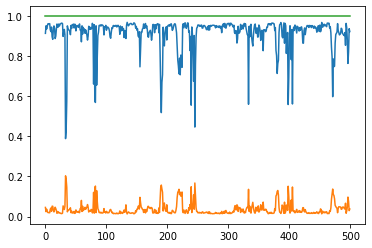

In [79]:
plot_scores(_mean,_std,human,60000,60500);

Band Scanning bad at the end points?

Potential for automatic cleaning?